In [9]:
import sqlite3
import scipy.io as sio
from enum import Enum
from skimage import data
from sklearn.metrics import accuracy_score

Create a connection to our recordings database to the images and metadata associated with each image

In [2]:
conn = sqlite3.connect('sessions.db')
c = conn.cursor()

Each recording has a label of the type of participant in the car. We will need an Enum so we can convert the text representation to an Integer. This will allow us to feed the labels into a classifier which only works with numbers.

In [3]:
class Participant(Enum):
     none = 0
     adult = 1
     child = 2
     pet = 3

Query the database for all recordings and retrive the images and their associated participant labels. `X` will contain a list of the images and `Y` will contain a list of each corresponding image's label.

In [4]:
rows = [r for r in c.execute('SELECT * FROM readings')]
image_paths = ['image_data/{}'.format(r[5]) for r in rows]
X = [data.imread(p) for p in image_paths]
Y = [Participant[r[2]].value for r in rows]

A example of reading and image and looking at the 

Class label: 1 (adult)


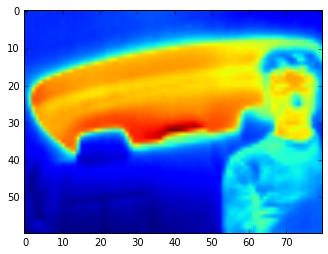

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[100])
label_integer = Y[100]
label_str = Participant(Y[100]).name
print('Class label: {} ({})'.format(label_integer, label_str))

An example of how to write a classifier and to see how well it works in terms of accuracy

In [6]:
def sample_classifier(X):
    if X[40,40] > 40:
        return 1
    else:
        return 0

In [7]:
predictions = [sample_classifier(x) for x in X]
accuracy_score(Y, predictions)

0.77500000000000002